In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


(9993, 6, 6)
(9993,)


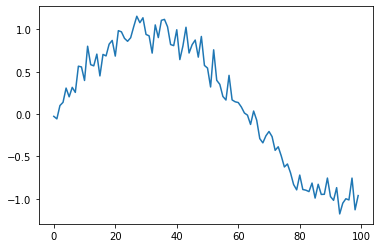

In [4]:
N = 10000
data = np.array([np.sin(x/20) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])


off = 3 # отсчетов до точки предсказания 
length = off*2+1 # всего отсчетов
# формирование обучающей выборки
X = np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length)]) # i:i+off - 3 отсчета до , i+off+1:i+length - 3 отсчета после
Y = data[off:N-off-1] # off:N-off-1 все элементы, начиная с прогнозируемого
print(X.shape, Y.shape, sep='\n')


In [6]:
model = Sequential()
model.add(Input((length-1, length-1)))
model.add( Bidirectional(GRU(2)) )
model.add(Dense(1, activation='linear')) # линейная, т.к это задача регрессии
model.summary() # выходной нейрон - один, т.к будем получать один прогноз

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 4)                120       
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
313/313 [==============================] - 5s 3ms/step - loss: 0.0394
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0123
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0120
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0120
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0119
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0119


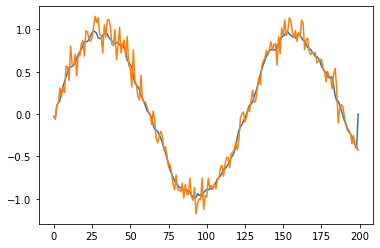

In [9]:
# строим прогноз
M = 200 # 200 прогнозов
XX = np.zeros(M)
XX[:off] = data[:off] # копируем первые 3 элемента из коллекции data 
for i in range(M-off-1):
    # формируем входные данные для нейронной сети
    x = np.diag( np.hstack( (XX[i:i+off], data[i+off+1:i+length])) )
    x = np.expand_dims(x, axis=0) # добавляем нулевую ось, чтобы была нужная размерность для входа в сеть
    y = model.predict(x) # вычисленное значение Y вводим в XX 
    XX[i+off] = y

plt.plot(XX[:M])
plt.plot(data[:M])